In [206]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from scipy.optimize import fmin_l_bfgs_b

# Minimum of a function with single parameter

For a single-attribute function J we would like to find the value of its attribute where the function has its minima. First, we define the function and plot it.

In [207]:
def J(theta):
    # return theta**4 + 4*theta**3 - 2
    return theta**2 - 4*theta -5

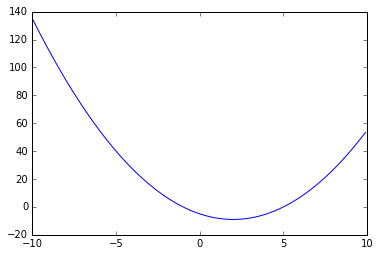

In [208]:
thetas = np.arange(-10, 10, 0.1)
plt.plot(thetas, J(thetas));

We use a method of finite diference to approximate a derivative of the function. Then, we check this function if it gives sensible results for J, our target function. We then analytically compute the derivative and check if the two means of finding the derivative give approximately the same results.

In [209]:
def fdm(f, x, eps=1e-5):
    """Approximates derivate of f in x by finite differences method"""
    return (f(x+eps) - f(x-eps))/(2*eps)

In [210]:
thetas = np.array([4, -6, -8])
fdm(J, thetas)

array([  4., -16., -20.])

In [211]:
def dJ(theta):
    # return 4*theta**3 + 12*theta**2
    return 2*theta - 4

In [212]:
dJ(thetas)

array([  4, -16, -20])

To find the minimum, we start at some initial value of the parameter x0. Then we compute the derivative at this point, and move in the direction opposite to derivative. We should take care to move in a small step, not to overshoot our target, the minimum of a function. Note that close to the minimum the function flattens, the derivative is close to zero, so the corrections of the parameter value are small and the procedure converges.

In [160]:
def find_min(df, x0, learning_rate=1e-3, err=1e-3):
    """Returns a minimum of a function with derivative df"""
    x = x0
    while True:
        x_new = x - learning_rate * df(x)
        if np.linalg.norm(x-x_new) < err:
            break
        x = x_new
    return x

In [161]:
find_min(lambda x, f=J: fdm(f, x), 0, learning_rate=1e-2, err=1e-5)

1.9995046101466407

In [214]:
find_min(dJ, -6, learning_rate=1e-2, err=1e-5)

1.999508406287749

We got very similar results with approximation of derivative and the functiona that uses analytical value of derivative. The variant with the analytically computed derivative is faster, though. Why? Finally, we also use an [optimization function from scipy](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fmin_l_bfgs_b.html) that converges much faster.

In [162]:
import scipy.optimize

In [163]:
fmin_l_bfgs_b(J, 0, dJ)

(array([ 2.]),
 array([-9.]),
 {'funcalls': 3,
  'grad': array([ 0.]),
  'nit': 2,
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'warnflag': 0})

# Minimum of a function with more (actually, two) attributes

We extend the procedures to functions with more than one attribute. We here do it for the two-attribute function, but the code is amiable for functions with any number of attributes. The attributes theta is now a vector.

In [218]:
def J(theta):
    return (theta[0] - 1)**2 + (2*theta[1] + 3)**2

In [219]:
def dJ(theta):
    return np.array([2*(theta[0]-1), 4*(2*theta[1]+3)])

In [220]:
J(np.array([-1,-1]))

5

In [221]:
theta0 = np.array([0, 0])
# find_min(lambda x, f=J: fdm(f, x), np.array([0, 0]), learning_rate=1e-2, err=1e-5)
find_min(dJ, theta0, learning_rate=1e-2, err=1e-5)

array([ 0.9995077, -1.5      ])

In [222]:
fmin_l_bfgs_b(J, theta0, dJ)

(array([ 1.00000344, -1.50000053]),
 1.2982344753279782e-11,
 {'funcalls': 7,
  'grad': array([  6.88905043e-06,  -4.22864669e-06]),
  'nit': 6,
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'warnflag': 0})

# Gradient check

We compare the gradient computed by the [finite difference](https://en.wikipedia.org/wiki/Finite_difference) method with a analyticially computed gradient. Functions for which we seek the minima are sometimes complex, and it is good to know that our analytical solution is right, that is, that it gives the correct result. Its also ok to check if the results are ok if the values of theta vary.

In [223]:
def grad_approx(f, theta, eps=1e-1):
    return np.array([(f(theta+e) - f(theta-e))/(2*eps)
                     for e in np.identity(len(theta)) * eps])

In [224]:
thetas = np.array([0.5, 0.5])
grad_approx(J, thetas)

array([ -1.,  16.])

In [225]:
dJ(thetas)

array([ -1.,  16.])